# About dataset

### Context:

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

### Content:

It contains the following 6 fields:

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2. ids: The id of the tweet ( 2087)

3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5. user: the user that tweeted (robotickilldozr)

6. text: the text of the tweet (Lyx is cool)


Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

In [11]:
#import necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Read the CSV file without headers

data = pd.read_csv('twitter-reviews.csv', encoding='ISO-8859-1', header=None)


In [13]:
data.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [14]:
# Define column names

column_names = ['target', 'ids', 'date', 'flag','user','text']

In [15]:
#Add headers to your dataframe

data.columns = column_names

In [16]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
# check the data types and other inconsistencies

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [18]:
data.shape

(1600000, 6)

#### Date column

In [20]:
data['date'].head(5)

0    Mon Apr 06 22:19:45 PDT 2009
1    Mon Apr 06 22:19:49 PDT 2009
2    Mon Apr 06 22:19:53 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:19:57 PDT 2009
Name: date, dtype: object

date column contains timezone "PDT"

In [22]:
# 'pytz' library : pandas' built-in timezone capabilities

!pip install pytz

In [24]:
# Convert 'date' column to datetime

data['date'] = pd.to_datetime(data['date'])


In [25]:
# Localize to UTC first (if the data is not timezone-aware)

data['date'] = data['date'].dt.tz_localize('UTC')

In [26]:
# Convert to Pacific Daylight Time (PDT)

data['date'] = data['date'].dt.tz_convert('US/Pacific')

In [28]:
# Convert to UTC (Optional step)

data['date_utc'] = data['date'].dt.tz_convert('UTC')

In [29]:
# Extract month

data['month'] = data['date'].dt.month_name()

#### Target column

In [35]:
data['target'].unique()

array([0, 4], dtype=int64)

In [42]:
# Calculate the counts of each target

data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

#### text column

In [47]:
# remove usernames and urls

import re

In [48]:
# Function to remove usernames and URLs

def clean_text(text):
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text


# Apply the function to the 'text' column

data['cleaned_text'] = data['text'].apply(clean_text)

In [49]:
data['cleaned_text']

0          - A that's a bummer.  You shoulda got David Ca...
1          is upset that he can't update his Facebook by ...
2          I dived many times for the ball. Managed to sa...
3             my whole body feels itchy and like its on fire
4          no, it's not behaving at all. i'm mad. why am ...
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999                                happy #charitytuesday
Name: cleaned_text, Length: 1600000, dtype: object

#### TOP 5 FREQUENT WORDS

In [51]:
import nltk

# Download the nltk punkt data for sentence tokenization

nltk.download('punkt')

from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# join all entries into a single string

all_text = ' '.join(data['cleaned_text'].astype(str))

In [53]:
# Tokenize the text into words

words = word_tokenize(all_text)

In [54]:
# Remove stop words and punctuation

stop_words = set(stopwords.words('english'))

filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]


In [55]:
# Lemmatize the words

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]


In [56]:
# Calculate the frequency distribution of words

freq_dist = FreqDist(lemmatized_words)


In [57]:
# Find the top 5 most common words

top_words = freq_dist.most_common(5)


# Print the top 5 most common words and their frequencies

for word, frequency in top_words:
    print(f"The word '{word}' appears {frequency} times.")

The word 'day' appears 103289 times.
The word 'good' appears 90906 times.
The word 'get' appears 86148 times.
The word 'like' appears 79605 times.
The word 'go' appears 78132 times.


#### Sentiment Analysis

In [58]:
# Sentiment analysis using VADER

nltk.download('vader_lexicon')

#import sentiment intensity analyzer

from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
# Replace NaN with an empty string

data['cleaned_text'] = data['cleaned_text'].fillna('') 


In [60]:
#Initialize the Sentiment Intensity Analyzer

sia = SentimentIntensityAnalyzer()

In [62]:
# Create a new column 'Sentiment' with sentiment scores

data['sentiment'] = data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [63]:
# Assign "positive" or "negative" based on sentiment score

data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


In [64]:
data.head(10)

,target,ids,date,flag,user,text,date_utc,month,sentiment,sentiment_label,cleaned_text
0,0,1467810369,2009-04-06 15:19:45-07:00,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45+00:00,April,-0.0173,negative,- A that's a bummer. You shoulda got David Ca...
1,0,1467810672,2009-04-06 15:19:49-07:00,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49+00:00,April,-0.7500,negative,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 15:19:53-07:00,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53+00:00,April,0.4939,positive,I dived many times for the ball. Managed to sa...
3,0,1467811184,2009-04-06 15:19:57-07:00,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57+00:00,April,-0.2500,negative,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 15:19:57-07:00,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57+00:00,April,-0.6597,negative,"no, it's not behaving at all. i'm mad. why am ..."
5,0,1467811372,2009-04-06 15:20:00-07:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00+00:00,April,0.0000,neutral,not the whole crew
6,0,1467811592,2009-04-06 15:20:03-07:00,NO_QUERY,mybirch,Need a hug,2009-04-06 22:20:03+00:00,April,0.4767,positive,Need a hug
7,0,1467811594,2009-04-06 15:20:03-07:00,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,2009-04-06 22:20:03+00:00,April,0.7450,positive,"hey long time no see! Yes.. Rains a bit ,only..."
8,0,1467811795,2009-04-06 15:20:05-07:00,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,2009-04-06 22:20:05+00:00,April,0.0000,neutral,nope they didn't have it
9,0,1467812025,2009-04-06 15:20:09-07:00,NO_QUERY,mimismo,@twittera que me muera ?,2009-04-06 22:20:09+00:00,April,0.0000,neutral,que me muera ?


In [65]:
# Calculate the counts of each sentiment label

data['sentiment_label'].value_counts()

positive    748719
neutral     429929
negative    421352
Name: sentiment_label, dtype: int64

#### Pivot table for months and count of sentiments

In [84]:
# Create a DataFrame with month and sentiment_label columns

month_sentiment_counts = data.groupby(['month', 'sentiment_label'])['sentiment_label'].count().reset_index(name='count')


In [85]:
# Pivot the table to create separate columns for positive and negative counts

pivot_table = month_sentiment_counts.pivot(index='month', columns='sentiment_label', values='count')


In [86]:
# Fill NaN values with 0 (in case a category has only one sentiment label)

pivot_table.fillna(0, inplace=True)


In [87]:
# Calculate the total reviews for each month

pivot_table['total_reviews'] = pivot_table['negative'] + pivot_table['positive'] + pivot_table['neutral']


In [88]:
# Reset the index to have 'category' as a regular column

pivot_table.reset_index(inplace=True)


In [89]:
# If a category has no negative or positive reviews, replace NaN with 0

pivot_table['negative'].fillna(0, inplace=True)
pivot_table['positive'].fillna(0, inplace=True)

print(pivot_table)


sentiment_label  month  negative  neutral  positive  total_reviews
0                April     23225    27287     49513         100025
1                 June    261556   238843    391960         892359
2                  May    136571   163799    307246         607616


In [126]:
#convert the time table into dataframe

pd.DataFrame(pivot_table)

sentiment_label,negative,neutral,positive,total_reviews
month,,,,
April,23225,27287,49513,100025
June,261556,238843,391960,892359
May,136571,163799,307246,607616


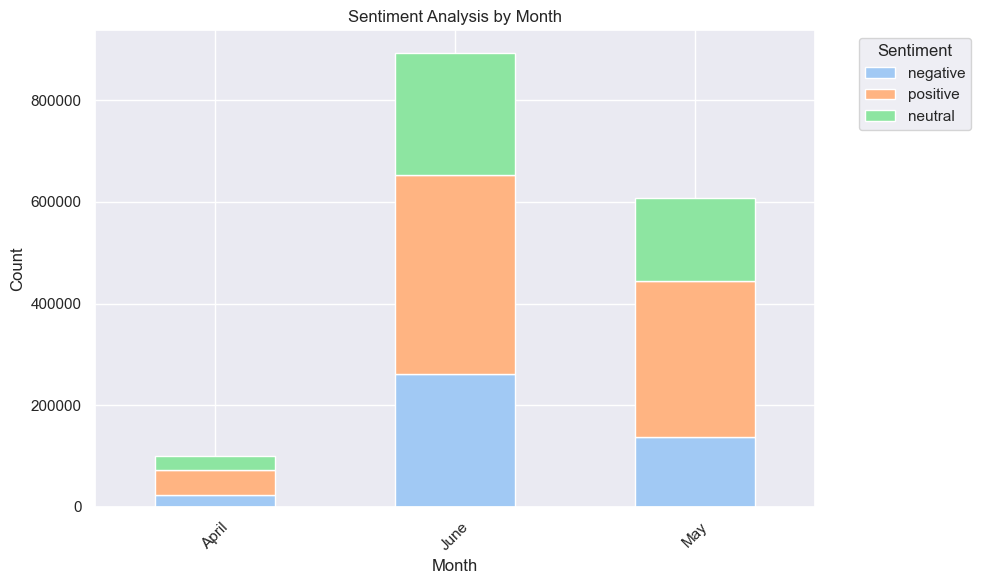

sentiment_label   negative    neutral   positive
month                                           
April            23.219195  27.280180  49.500625
June             29.310625  26.765349  43.924026
May              22.476531  26.957651  50.565818


In [124]:
# Calculate percentages

pivot_table_percentages = pivot_table[['negative','neutral','positive']].div(pivot_table[['negative','neutral','positive']].sum(axis=1), axis=0) * 100


# plot the stacked bar graph over months

sns.set_palette('pastel')

ax = pivot_table[['negative','positive','neutral']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Sentiment Analysis by Month')

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

print(pivot_table_percentages)

# INSIGHTS

1. **April**: 
   - **Negative**: 23.22%
   - **Neutral**: 27.28%
   - **Positive**: 49.50%
   
   April shows a fairly balanced sentiment distribution, with almost half of the reviews expressing positivity, while negative and neutral sentiments are relatively lower but still significant.

2. **May**: 
   - **Negative**: 22.48%
   - **Neutral**: 26.96%
   - **Positive**: 50.57%
   
   May exhibits a similar pattern to April, with slightly lower negative sentiment and slightly higher positive sentiment. Again, positivity dominates, indicating a generally favorable sentiment among Twitter users.

3. **June**: 
   - **Negative**: 29.31%
   - **Neutral**: 26.77%
   - **Positive**: 43.92%
   
   June stands out with a higher proportion of negative sentiment compared to the other two months. Positive sentiment also decreases noticeably, while neutral sentiment remains relatively stable. This could suggest a shift in sentiment or perhaps specific events or topics dominating Twitter discussions that month.

Overall, while there are fluctuations in sentiment percentages between the months, positivity consistently outweighs negativity across all three months.

# INSIGHTS

The top 5 most frequent words:

1. **"day"**: With its high frequency, "day" likely appears in various contexts, from positive to neutral to negative. It's a common word used to describe experiences, events, or simply the passing of time. Sentiments associated with "day" could range from positive (e.g., "great day", "beautiful day") to neutral (e.g., "ordinary day") to negative (e.g., "bad day", "rough day").

2. **"good"**: The frequency of "good" suggests its prevalent usage in expressing positivity. It's often associated with favorable experiences, feelings, or qualities. Sentiments related to "good" are predominantly positive, reflecting satisfaction, approval, or enjoyment.

3. **"get"**: "Get" is a versatile word that appears in various contexts, such as obtaining something, receiving an action, or achieving a goal. Sentiments tied to "get" may vary depending on the context. It could convey positivity when indicating attainment or accomplishment ("get a promotion"), or it might imply frustration or challenge when expressing difficulty ("can't get it right").

4. **"like"**: "Like" is another versatile word that can convey different sentiments based on its usage. It often signifies affinity, preference, similarity, or comparison. Sentiments associated with "like" can range from positive (e.g., "I like it", "feels like home") to neutral (e.g., "looks like", "sounds like") to potentially negative in certain contexts (e.g., "I don't like it", "feels like a chore").

5. **"go"**: The word "go" is commonly associated with movement, action, or progression. Its frequent appearance suggests usage in various contexts, from describing physical motion to indicating plans or outcomes. Sentiments related to "go" can vary widely depending on context, from positive (e.g., "let's go", "going well") to neutral (e.g., "time to go", "where did it go?") to negative (e.g., "things are going downhill", "letting it go").